<a href="https://colab.research.google.com/github/TejashreePatil8951/DeepLearning/blob/main/Handwitten_Digit_Classificatiion_Poject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Handwritten Digit Classification Project**

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

Load MNIST datset

In [4]:
from keras.datasets import mnist
(xtrain, ytrain),(xtest, ytest) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
xtrain.shape

(60000, 28, 28)

In [5]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

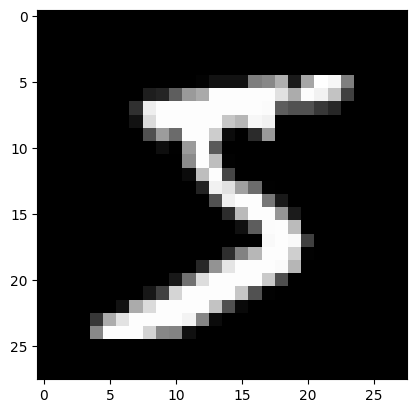

In [7]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0], cmap='gray')

In [8]:
xtest.shape

(10000, 28, 28)

In [9]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

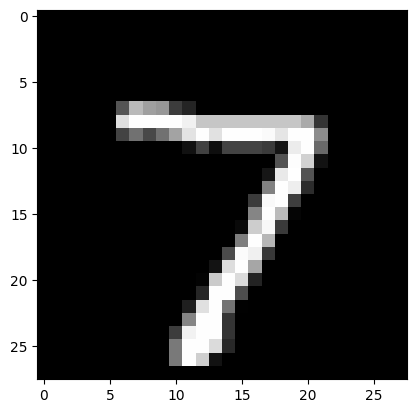

In [10]:
plt.imshow(xtest[0], cmap='gray')

Displaying first 9 images from train data

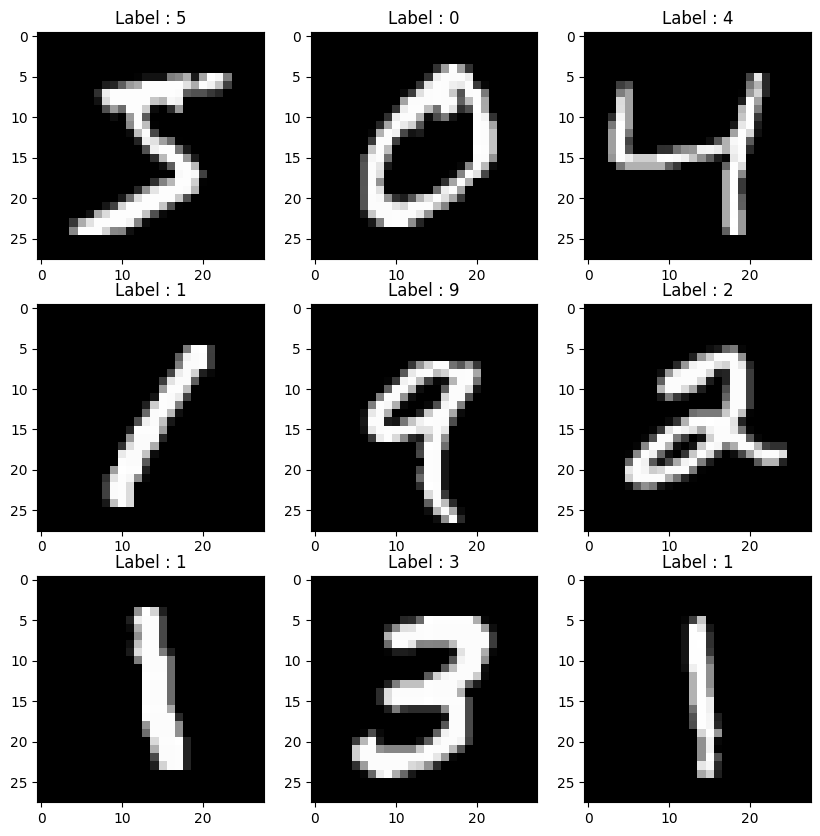

In [11]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(xtrain[i] , cmap='gray')
  plt.title(f"Label : {ytrain[i]}")

In [12]:
import numpy as np
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
len(np.unique(ytrain))

10

This is a multiclass classification problem

Preprocess image data

In [14]:
xtrain_scl= xtrain.astype("float32")/255
xtest_scl = xtest.astype("float32")/255

In [15]:
xtrain_scl[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Onehot encode the y features

In [16]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)


In [17]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [18]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [19]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [20]:
ytest_cat[0:5]


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
xtrain.shape

(60000, 28, 28)


Build the neural network

In [22]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [23]:
model = Sequential()

# Added Input layer
model.add(Input(shape=(28, 28, 1)))

# Add Convolution Layer 1
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

# Add Max pooling 1
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Convolution Layer2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Add Max pooling 2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Flatten Layer
model.add(Flatten())

# Add Dropout Layer
model.add(Dropout(0.5))

# Output layer
model.add(Dense(ytrain_cat.shape[1], activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [26]:
hist = model.fit(xtrain_scl, ytrain_cat, epochs=15, validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 12s 4ms/step - loss: 0.2293 - accuracy: 0.9291 - val_loss: 0.0594 - val_accuracy: 0.9832
Epoch 2/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0865 - accuracy: 0.9732 - val_loss: 0.0492 - val_accuracy: 0.9860
Epoch 3/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0677 - accuracy: 0.9784 - val_loss: 0.0425 - val_accuracy: 0.9878
Epoch 4/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0568 - accuracy: 0.9814 - val_loss: 0.0389 - val_accuracy: 0.9887
Epoch 5/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0495 - accuracy: 0.9837 - val_loss: 0.0303 - val_accuracy: 0.9925
Epoch 6/15
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0440 - accuracy: 0.9862 - val_loss: 0.0347 - val_accuracy: 0.9905
Epoch 7/15
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0427 - accuracy: 0.9865 - val_loss: 0.0341 - val_accura


Plot the learning curve

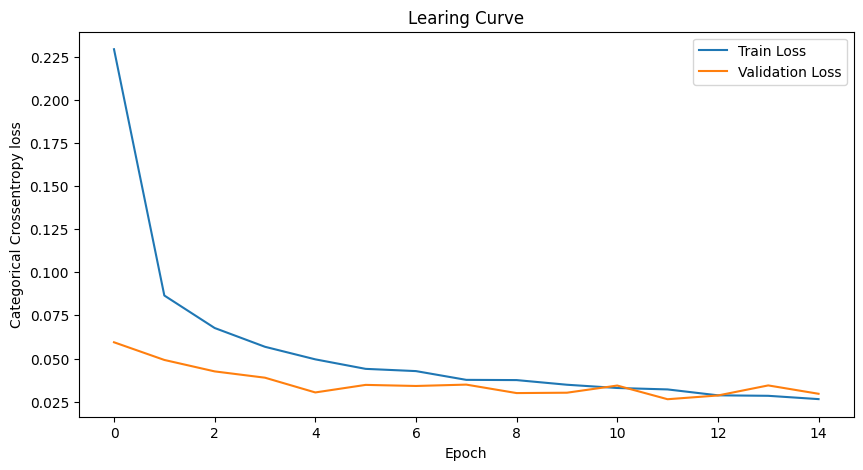

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Learing Curve')
plt.ylabel('Categorical Crossentropy loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Evaluate the model in train and test

In [28]:
model.evaluate(xtrain_scl, ytrain_cat)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0105 - accuracy: 0.9972


[0.010529588907957077, 0.9971666932106018]

In [29]:
model.evaluate(xtest_scl, ytest_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0224 - accuracy: 0.9931


[0.02239588089287281, 0.9930999875068665]

Predict results for train and test

In [30]:
yprob_train = model.predict(xtrain_scl)
yprob_test = model.predict(xtest_scl)

313/313 [==============================] - 1s 2ms/step


In [31]:
yprob_train[0:5]

array([[1.25084654e-12, 1.03854989e-12, 5.66269531e-10, 2.21944274e-03,
        4.16831337e-13, 9.97779667e-01, 4.43085880e-11, 5.59996138e-09,
        8.55506016e-07, 1.49364269e-07],
       [9.99998450e-01, 5.98738350e-18, 1.42543934e-06, 7.90806049e-12,
        1.21615990e-11, 1.77385721e-12, 1.19346275e-08, 8.46810955e-11,
        1.24041277e-09, 6.95297118e-08],
       [9.89610933e-16, 6.11855526e-08, 1.92286587e-09, 1.41130952e-11,
        9.99982119e-01, 1.03676130e-11, 1.74540097e-13, 1.60386517e-05,
        8.87279228e-09, 1.71693512e-06],
       [4.10979606e-09, 9.99983072e-01, 4.20003346e-07, 4.34680597e-10,
        3.12018051e-06, 3.94740823e-10, 4.32159659e-08, 8.16087140e-06,
        5.08136964e-06, 7.59621610e-09],
       [7.60040739e-13, 7.56442999e-12, 7.07918280e-10, 3.12383941e-09,
        5.03268211e-06, 4.14101635e-11, 4.68673918e-16, 3.70438045e-07,
        7.21338574e-06, 9.99987364e-01]], dtype=float32)

In [32]:
yprob_test[0:5]

array([[2.4655555e-10, 2.7615620e-12, 7.3752182e-07, 7.9203289e-07,
        1.0920965e-14, 7.8291471e-12, 8.0748734e-18, 9.9999833e-01,
        1.0439226e-09, 5.8991535e-08],
       [2.6840237e-08, 3.2642873e-08, 9.9999928e-01, 8.8356968e-11,
        5.8780238e-11, 1.7386883e-14, 7.2235599e-07, 1.3072805e-12,
        3.9916448e-09, 4.0218254e-12],
       [3.7898804e-09, 9.9995303e-01, 2.0908422e-07, 4.0176666e-09,
        3.5677374e-05, 2.2826059e-08, 4.4274736e-07, 2.8364777e-06,
        7.7820250e-06, 8.7182004e-09],
       [9.9981099e-01, 9.5294235e-16, 6.4257387e-07, 9.6741504e-10,
        2.6355346e-10, 1.9385553e-08, 1.8620926e-04, 1.4726388e-08,
        1.5643169e-06, 5.7864992e-07],
       [8.9787396e-12, 1.8037839e-12, 4.5632276e-10, 7.1212936e-13,
        9.9999940e-01, 2.3420567e-12, 1.5541481e-10, 1.0626307e-09,
        1.2183609e-09, 5.6963074e-07]], dtype=float32)

In [33]:
import numpy as np
ypred_train = np.argmax(yprob_train, axis=1)
ypred_test = np.argmax(yprob_test, axis=1)

In [34]:
ypred_train[0:5]

array([5, 0, 4, 1, 9])

In [35]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [36]:
ypred_test[0:5]

array([7, 2, 1, 0, 4])

In [37]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)


Plot the confusion Matrix

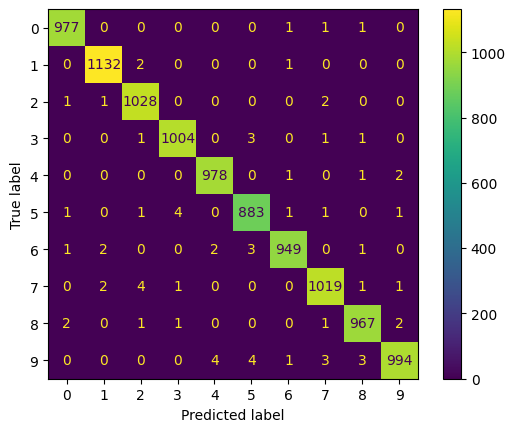

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Save above model for future use**

In [40]:
model.save('digit_model.keras')


**Load above model**

In [41]:
from keras.models import load_model
nn = load_model('/content/digit_model.keras')
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [50]:
import cv2
img=cv2.imread('/content/img1.jpg',cv2.IMREAD_GRAYSCALE)
img

array([[  0,   3,   3,   0,   0,   3,   0,   0,   0,   1,   0,   2,   0,
          0,   3,   0,   1,   0,   2,   0,   2,   0,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   6,   0,   0,   6,   1,   0,   1,   5,   0,   1,
          0,   1,   2,   1,   0,   0,   1,   0,   1,   0,   3,   0,   0,
          0,   0],
       [  1,   1,   0,   2,   0,   1,   0,   0,   4,   0,   1,   1,   1,
         74, 223, 222,  94,   0,   4,   0,   4,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   1,   0,   4,   0,  75, 222, 254, 255,
        254, 255, 255, 249,  94,   0,   1,   0,   0,   3,   0,   0,   0,
          0,   0],
       [  0,   2,   0,   1,   1,   0,   2,   0,  68, 242, 255, 254, 253,
        255, 253, 255, 250, 252,   0,   0,   4,   0,   2,   0,   0,   0,
          0,   0],
       [  1,   4,   0,   0,   1,   1,   0,  77, 241, 255, 255, 255, 255,
        252, 255, 253, 255, 255,  95,   0,   4,   0,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   2,   0,   1,   0,   1, 227, 255, 252, 253, 153,   0,
          1,   0, 248, 255, 254, 246,   2,   1,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   2,   1,   0,   0,   3,   0, 255, 254, 255, 151,   0,   1,
          1,   0, 120, 254, 255, 253,   2,   0,   2,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   3,   0,   0,   0,   1, 250, 252, 255,   1,   0,   2,
          2,   0,   1, 255, 252, 255,   0,   0,   1,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   2,   0,   0,   0, 116, 255, 153,   0,   5,   0,
          0,   4,   0, 254, 254, 254,   2,   2,   0,   2,   0,   0,   0,
          0,   0],
       [  1,   0,   0,   2,   0,   1,   2,   7,   0,   0,   4,   0,   3,
          0,   0,  72, 255, 255, 255,   0,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  1,   0,   1,   0,   0,   0,   1,   0,   1,   2,   2,   0,   0,
          4,   1, 233, 253, 255, 251,   1,   0,   0,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   4,   0,   2,   0,   0,   5,   0,   1,   0,   2,   1,
          0,  67, 255, 255, 252, 157,   1,   0,   1,   2,   0,   0,   0,
          0,   0],
       [  0,   2,   0,   0,   0,   1,   0,   0,   3,   1,   3,   0,   0,
         74, 243, 253, 253, 255,   0,   0,   1,   2,   0,   2,   0,   0,
          0,   0],
       [  1,   1,   0,   1,   0,   1,   3,   0,   0,   0,   0,   0,  99,
        239, 252, 255, 253, 150,   0,   7,   1,   0,   1,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   4,   0,   0,   1,   0,   3,   0,  73, 224, 253,
        252, 255, 255, 154,   0,   3,   0,   1,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,  69, 240, 255, 255,
        255, 255, 152,   0,   2,   0,   0,   2,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  72, 239, 255, 253, 254,
        166,   5,   0,   3,   0,   0,   0,  71, 191,  94,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 230, 255, 250, 255, 255,
        255, 255, 255, 252, 255, 255, 255, 251, 255, 246,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 250, 251, 255, 253, 255,
        253, 252, 253, 255, 255, 253, 255, 255, 255, 255,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 118, 252, 255, 253, 255,
        255, 255, 255, 254, 252, 255, 254, 254, 255, 151,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,   3,
          0,   0,   1,   1,   3,   0,   3,   1,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   1,   3,   0,
          3,   4,   0,   0,   2,   2,   0,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   2,   0,
          0,   0,   0,   4,   0,   0,   2,   0,   1,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [51]:
img_scl = img.astype('float32')/255

In [52]:
probs=model.predict(np.array([img_scl]))

1/1 [==============================] - 0s 19ms/step


In [53]:
probs

array([[5.7026640e-12, 2.3156895e-08, 9.9999940e-01, 6.1359026e-07,
        2.4696328e-11, 1.4509430e-17, 1.9227970e-12, 3.9943295e-11,
        3.3948305e-10, 2.8921723e-14]], dtype=float32)

In [54]:
pred=np.argmax(probs)
pred

2

In [55]:
prob = np.max(probs)
prob

0.9999994

In [56]:
def predict_number(path):
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  plt.imshow(img, cmap='gray')
  plt.show()
  img_scl = img.astype('float32')/255
  probs = model.predict(np.array([img_scl]))
  return pred, prob

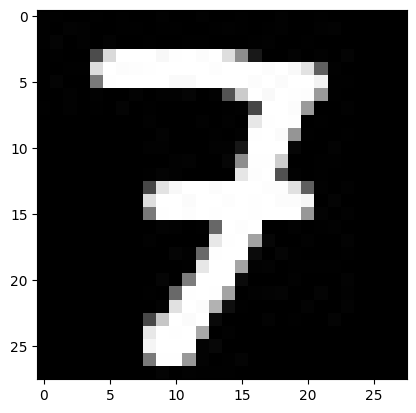

1/1 [==============================] - 0s 62ms/step


(2, 0.9999994)

In [57]:
predict_number('/content/example_img2.jpg')

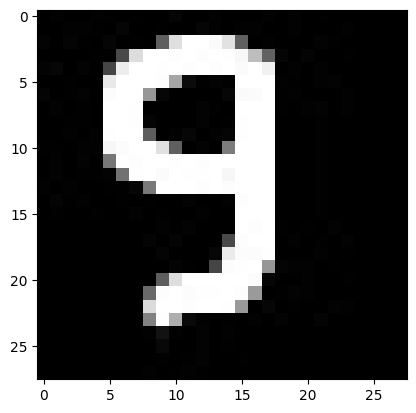

1/1 [==============================] - 0s 29ms/step


(2, 0.9999994)

In [58]:
predict_number("/content/example_img3.jpg")